In [13]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
# We will use the Seaborn library
import seaborn as sns
sns.set(style="ticks")
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [5]:
data = pd.read_csv('baseball_stats.csv')

In [6]:
data.head()

name handedness height weight    avg   HR
0  Brandon Hyde          R     75    210  0.000    0
1   Carey Selph          R     69    175  0.277    0
2  Philip Nastu          L     74    180  0.040    0
3    Kent Hrbek          L     76    200  0.282  293
4   Bill Risley          R     74    215  0.000    0

In [7]:
data.tail()

name handedness height weight    avg  HR
18172    Rob Nelson          L     76    215  0.178   4
18173  Roger Nelson          R     75    200  0.128   0
18174  Fred Luderus          L     71    185  0.277  84
18175      Ed Glenn          R     70    160  0.202   1
18176      Ed Glenn          R                0.067   0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18177 entries, 0 to 18176
Data columns (total 6 columns):
name          18177 non-null object
handedness    16974 non-null object
height        18177 non-null object
weight        18177 non-null object
avg           18177 non-null float64
HR            18177 non-null int64
dtypes: float64(1), int64(1), object(4)
memory usage: 852.1+ KB


In [9]:
data.describe

<bound method NDFrame.describe of                     name handedness height weight    avg   HR
0           Brandon Hyde          R     75    210  0.000    0
1            Carey Selph          R     69    175  0.277    0
2           Philip Nastu          L     74    180  0.040    0
3             Kent Hrbek          L     76    200  0.282  293
4            Bill Risley          R     74    215  0.000    0
5                   Wood        NaN                0.000    0
6        Steve Gajkowski          R     74    200  0.000    0
7              Rick Schu          R     72    170  0.246   41
8              Tom Brown          R     73    170  0.000    0
9           Tom Browning          L     73    190  0.153    2
10           Tommy Brown          R     73    170  0.241   31
11             Tom Brown          B     73    190  0.147    1
12              Joe Burg          R     70    143  0.326    0
13             Tom Brown          L     70    168  0.265   64
14         Terry McGriff          R 

In [11]:
lefthanded = data[data['handedness'] == 'R']['avg']
righthanded = data[data['handedness'] == 'L']['avg']

In [12]:
lefthanded.tail()

18170    0.125
18171    0.289
18173    0.128
18175    0.202
18176    0.067
Name: avg, dtype: float64

In [13]:
righthanded.tail()

18150    0.230
18155    0.249
18166    0.224
18172    0.178
18174    0.277
Name: avg, dtype: float64

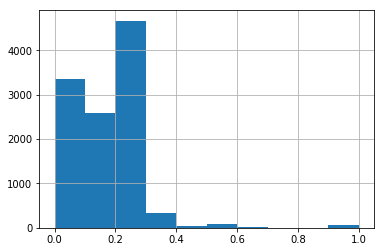

In [16]:
lefthanded.hist()

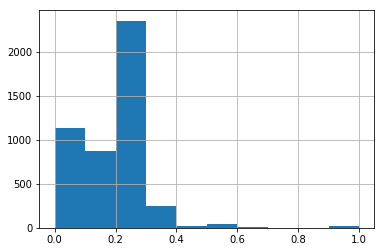

In [19]:
righthanded.hist()

# Testing for normality

In [8]:
def isnormal(data, alpha):
    res = st.shapiro(data)
    
    if res[1]<alpha:
        return False
    return True

In [25]:
isnormal(lefthanded, 0.05)

D:\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


False

# The Mann-Whitney U statistic


In [27]:
def non_parametric(a, b, alpha):
    res =st.stats.mannwhitneyu(a, b, alternative=None)
    if res[1]< alpha:
        return False
    return True

In [28]:
non_parametric(lefthanded, righthanded, 0.05)

False

# Welch's t-test

In [29]:
def parametric(c, d, alpha):
    res = st.stats.ttest_ind(c, d, equal_var=False)
    if res[1]< alpha:
        return False
    return True
    

In [30]:
parametric(lefthanded, righthanded, 0.05)

False

# data visiualization

In [5]:
data_vi = pd.read_csv('telecom_churn.csv')

In [33]:
data_vi.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18177 entries, 0 to 18176
Data columns (total 6 columns):
name          18177 non-null object
handedness    16974 non-null object
height        18177 non-null object
weight        18177 non-null object
avg           18177 non-null float64
HR            18177 non-null int64
dtypes: float64(1), int64(1), object(4)
memory usage: 852.1+ KB


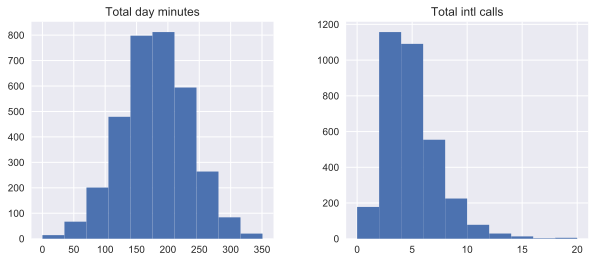

In [38]:
features = ['Total day minutes', 'Total intl calls']
data_vi[features].hist(figsize=(10, 4));

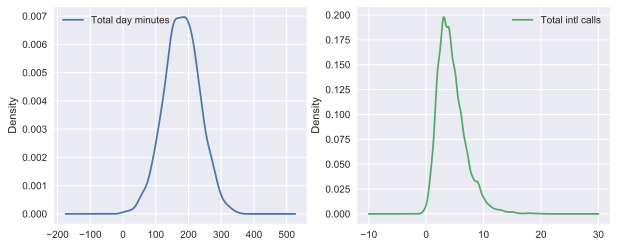

In [40]:
data_vi[features].plot(kind ='density', subplots='True', layout=(1,2), sharex=False, figsize=(10, 4));

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


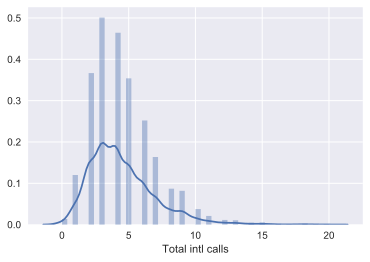

In [41]:
sns.distplot(data_vi['Total intl calls']);

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


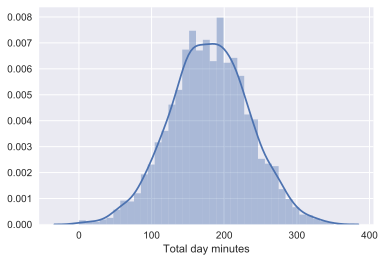

In [43]:
sns.distplot(data_vi['Total day minutes']);

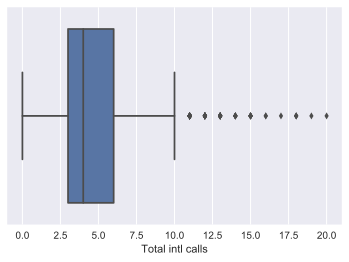

In [44]:
sns.boxplot(x='Total intl calls', data=data_vi);

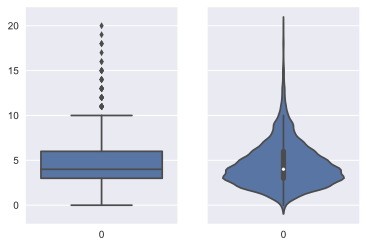

In [53]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=data_vi['Total intl calls'], ax=axes[0]);
sns.violinplot(data=data_vi['Total intl calls'], ax=axes[1]);

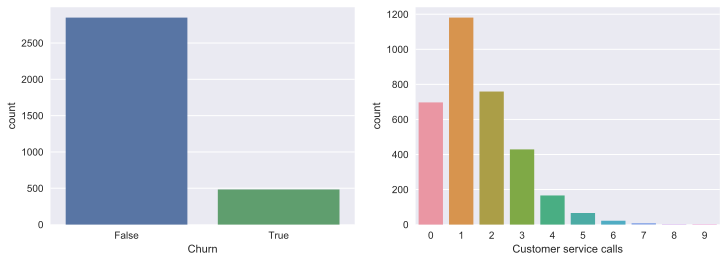

In [54]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='Churn', data=data_vi, ax=axes[0]);
sns.countplot(x='Customer service calls', data=data_vi, ax=axes[1]);

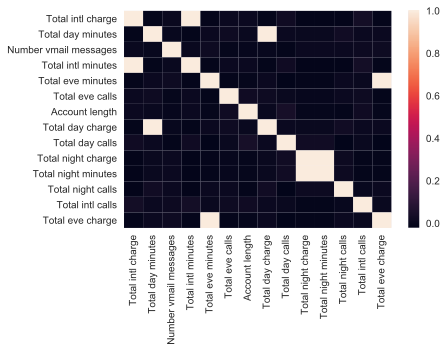

In [55]:
# Drop non-numerical variables
numerical = list(set(data_vi.columns) - 
                 set(['State', 'International plan', 'Voice mail plan', 
                      'Area code', 'Churn', 'Customer service calls']))

# Calculate and plot
corr_matrix = data_vi[numerical].corr()
sns.heatmap(corr_matrix);

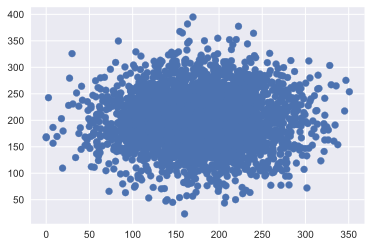

In [56]:
plt.scatter(data_vi['Total day minutes'], data_vi['Total night minutes']);

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


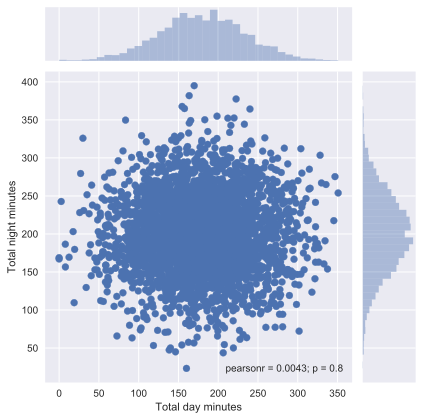

In [57]:
sns.jointplot(x='Total day minutes', y='Total night minutes', 
              data=data_vi, kind='scatter');

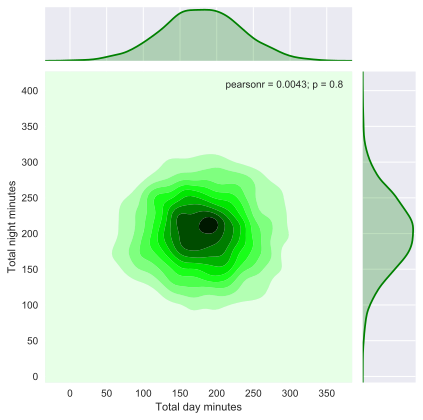

In [58]:
sns.jointplot('Total day minutes', 'Total night minutes', data=data_vi,
              kind="kde", color="g");

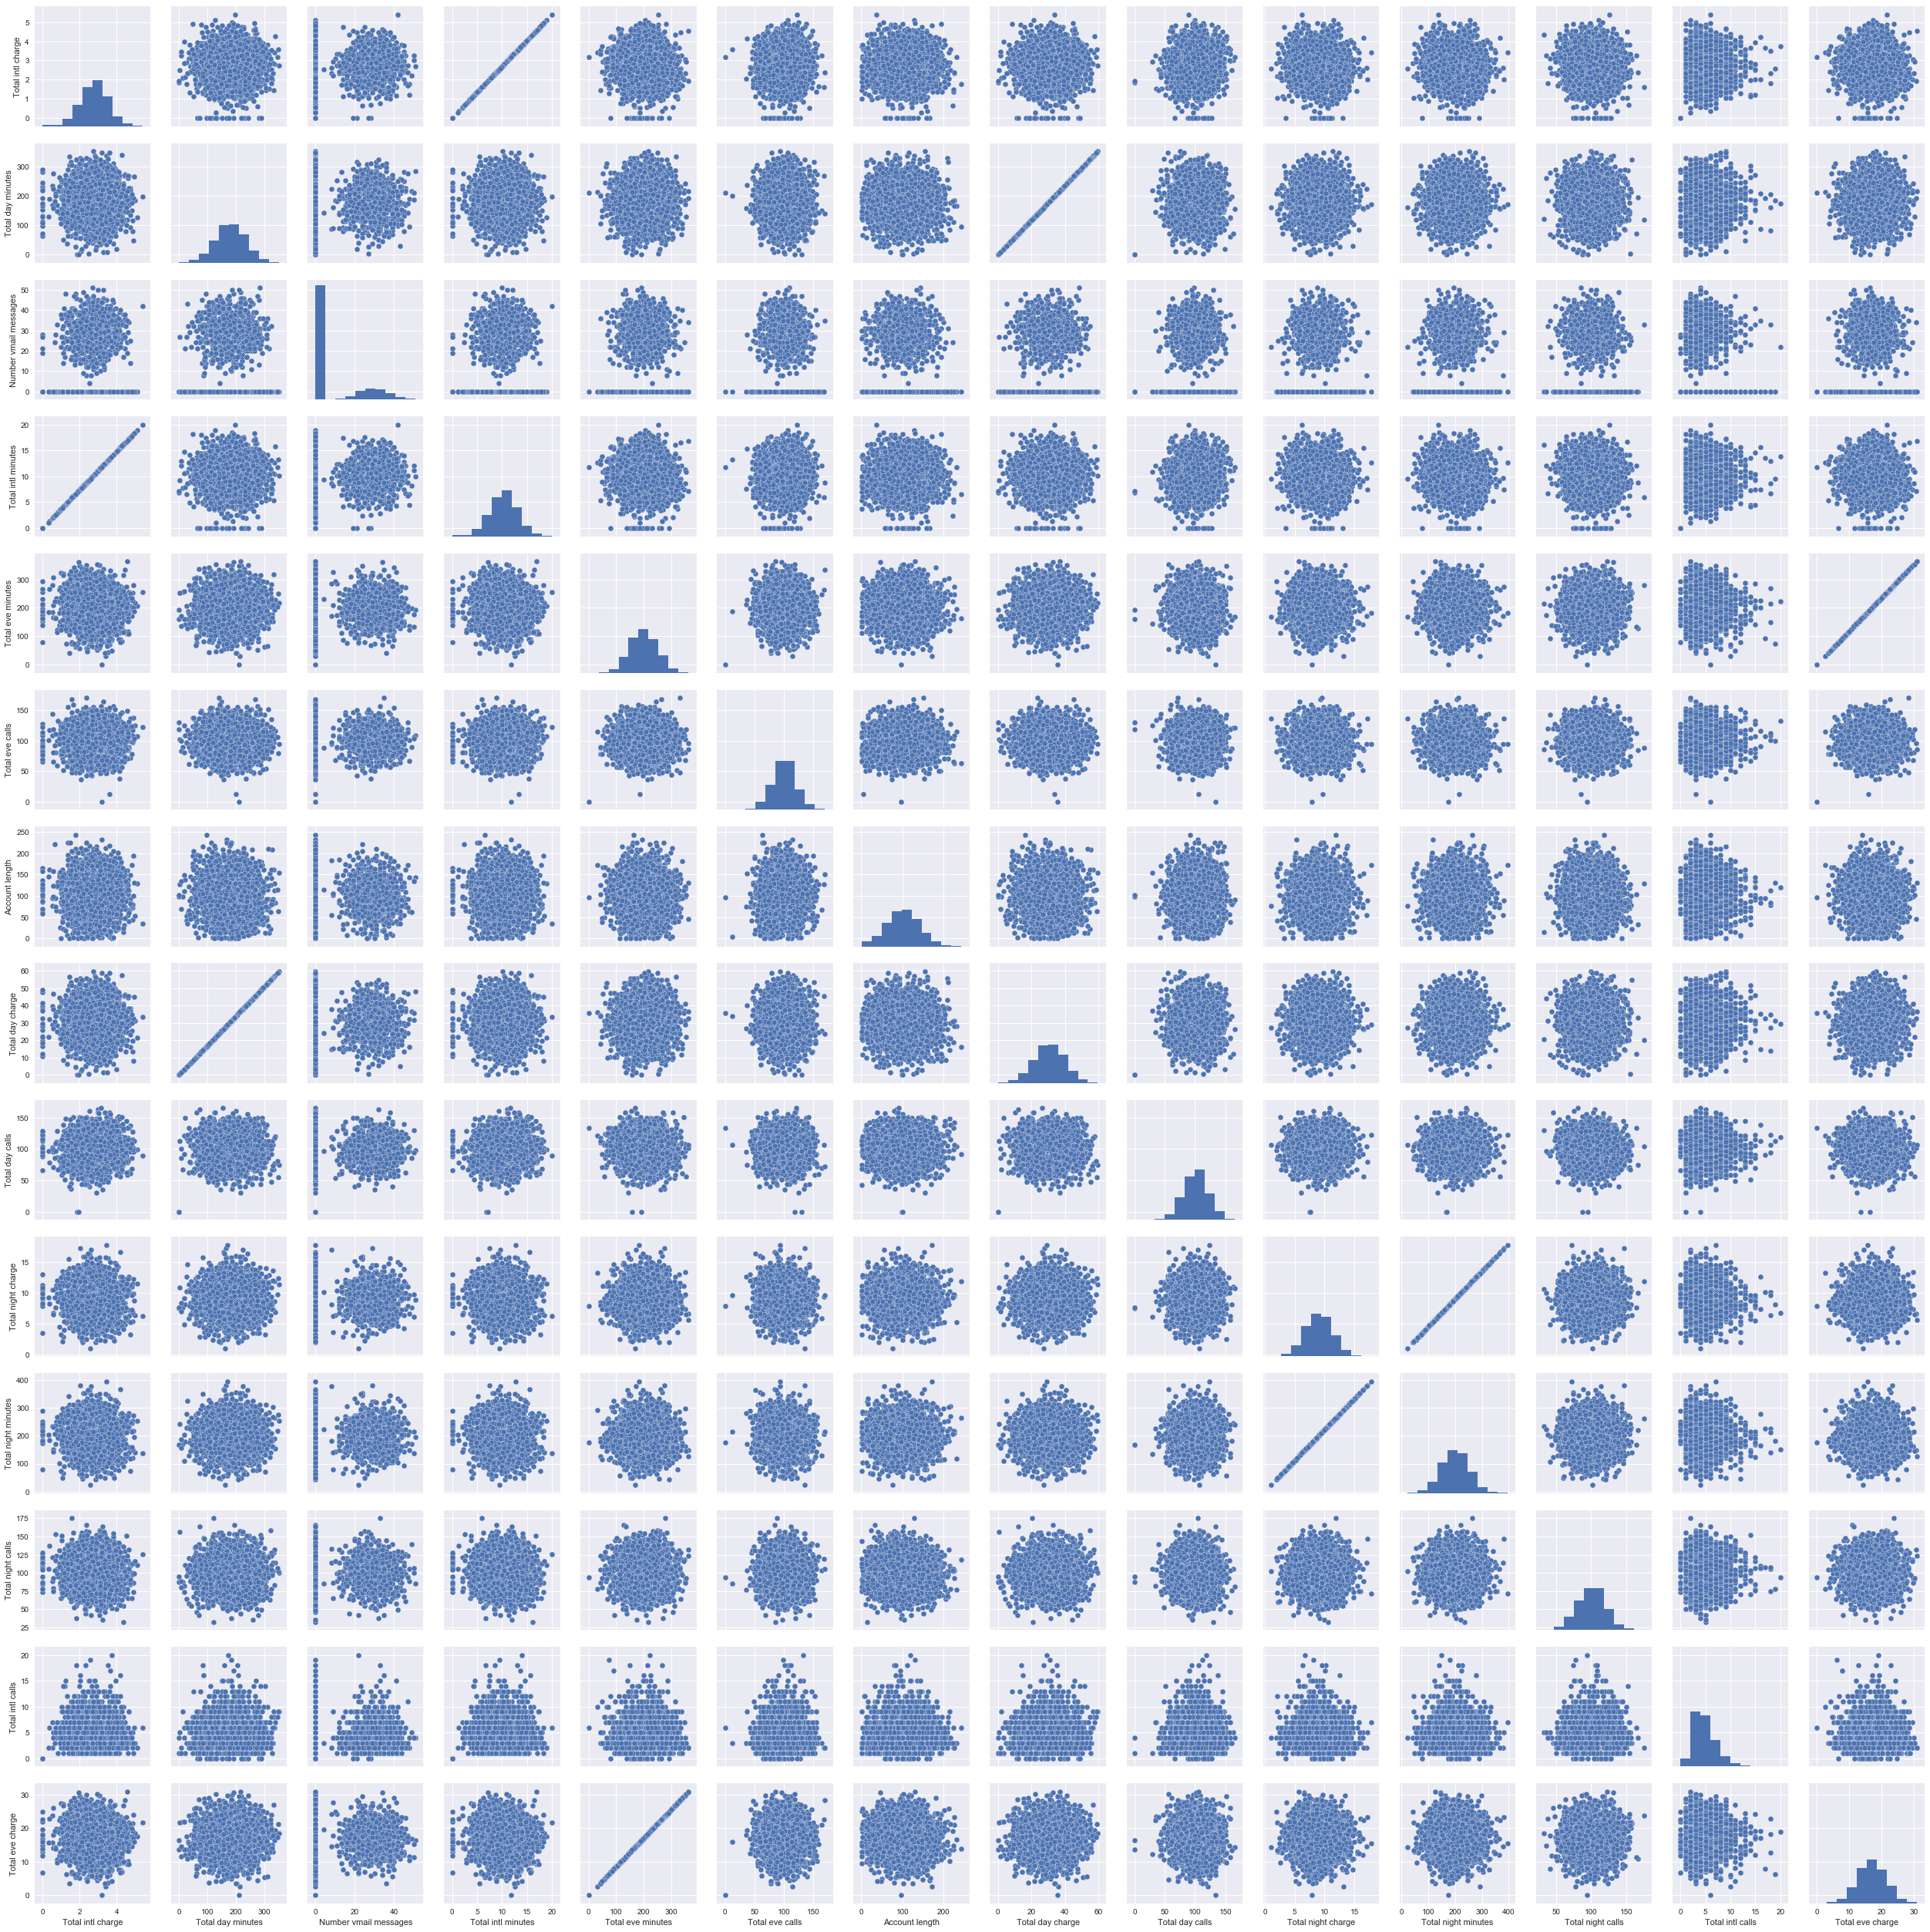

In [59]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(data_vi[numerical]);

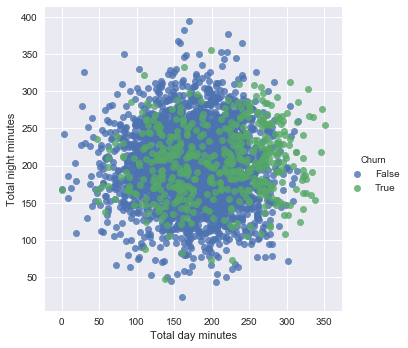

In [60]:
sns.lmplot('Total day minutes', 'Total night minutes', data=data_vi, hue='Churn', fit_reg=False);

IndexError: index 3 is out of bounds for axis 0 with size 3

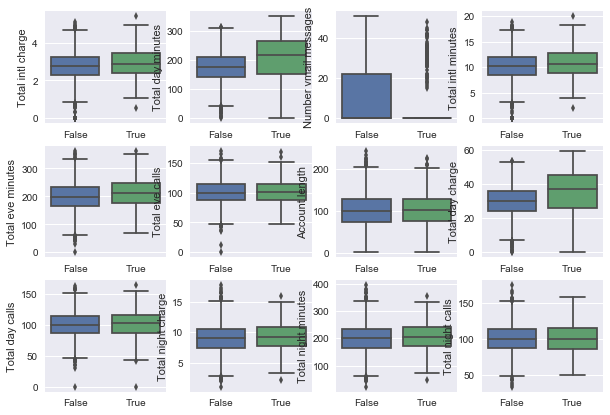

In [62]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append('Customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx/4), idx % 4]
    sns.boxplot(x='Churn', y=feat, data=data_vi, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

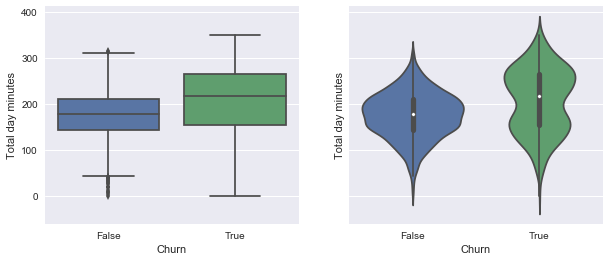

In [63]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='Churn', y='Total day minutes', data=data_vi, ax=axes[0]);
sns.violinplot(x='Churn', y='Total day minutes', data=data_vi, ax=axes[1]);

In [64]:
sns.catplot(x='Churn', y='Total day minutes', col='Customer service calls',
               data=data_vi[data_vi['Customer service calls'] < 8], kind="box",
               col_wrap=4, height=3, aspect=.8);

AttributeError: module 'seaborn' has no attribute 'catplot'

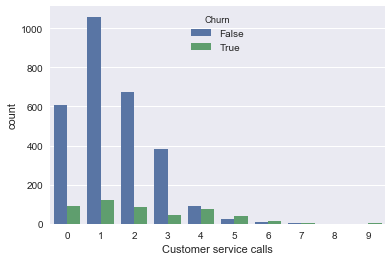

In [65]:
sns.countplot(x='Customer service calls', hue='Churn', data=data_vi);

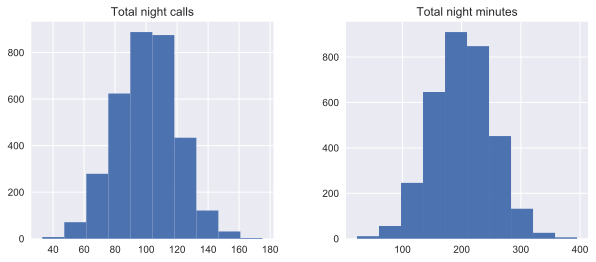

In [7]:
feat = ['Total night minutes', 'Total night calls']
data_vi[feat].hist(figsize =(10, 4));

In [17]:
sns.catplot(x='Churn', y='Total day minutes', col='Customer service calls', 
           data=data_vi[data_vi['Customer service calls']< 8],kind="box",
           col_wrap=4, height=3, aspect=.8);

AttributeError: module 'seaborn' has no attribute 'catplot'